## 6 -> Data Visualization

### Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('husl')

df = pd.read_csv('../data/processed/feature_engineered.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

customer_metrics = pd.read_csv('../data/processed/customer_metrics.csv')

C:\Users\ychow\AppData\Local\Temp\ipykernel_996\2289273509.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1.Customer Purchase Patterns Over Time

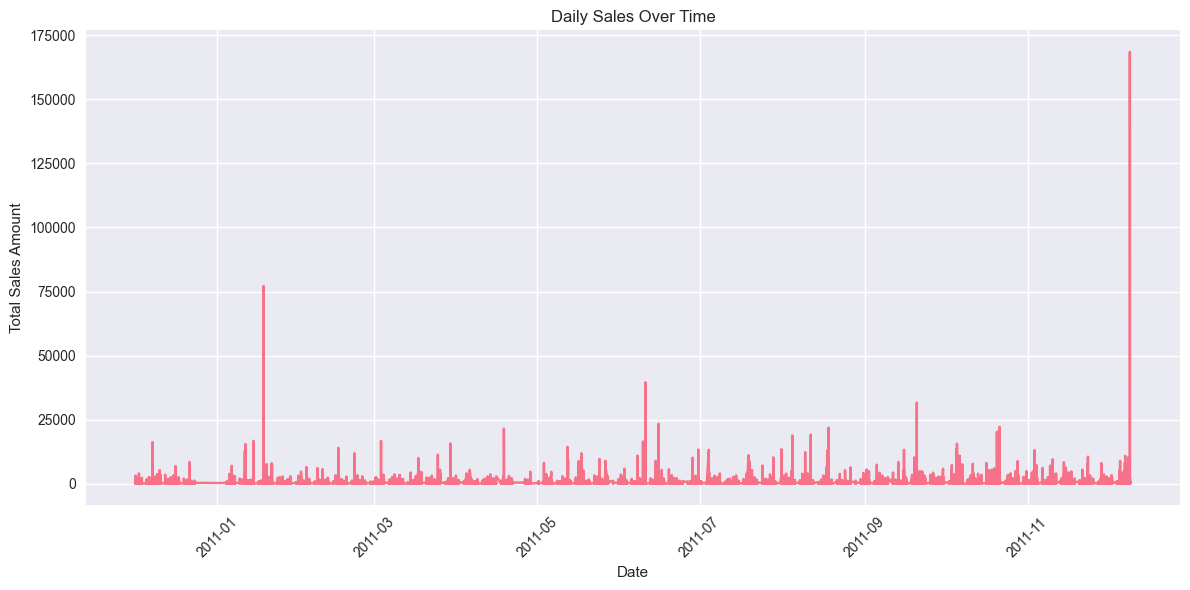

In [2]:
plt.figure(figsize=(12, 6))
daily_sales = df.groupby('InvoiceDate')['TotalAmount'].sum().reset_index()
plt.plot(daily_sales['InvoiceDate'], daily_sales['TotalAmount'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.Sales By Time Of Day

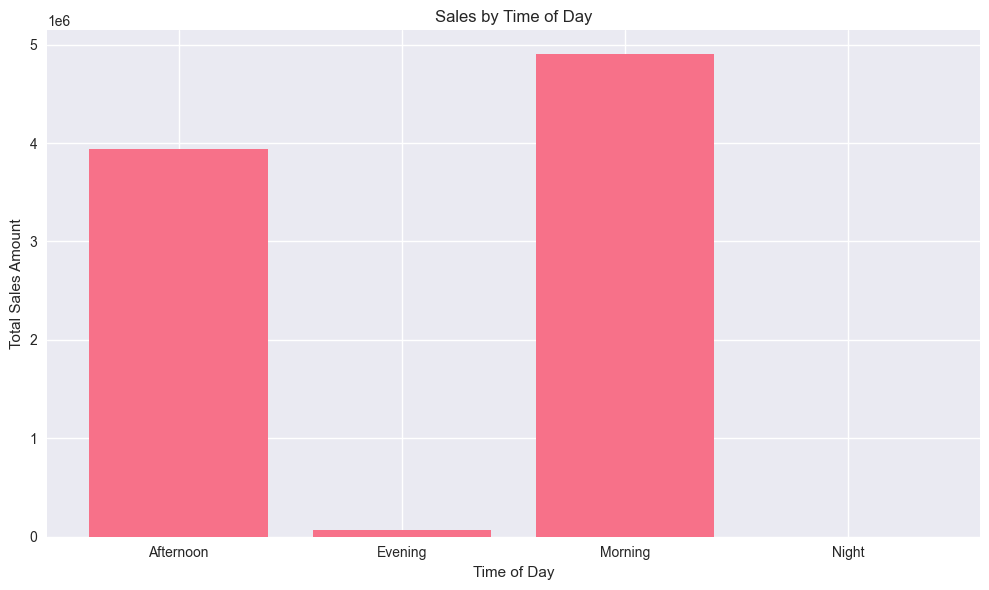

In [3]:
plt.figure(figsize=(10, 6))
time_of_day_sales = df.groupby('TimeOfDay')['TotalAmount'].sum().reset_index()
plt.bar(time_of_day_sales['TimeOfDay'], time_of_day_sales['TotalAmount'])
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

### 3.Customer Segmentation By Purchase Frequency & Value

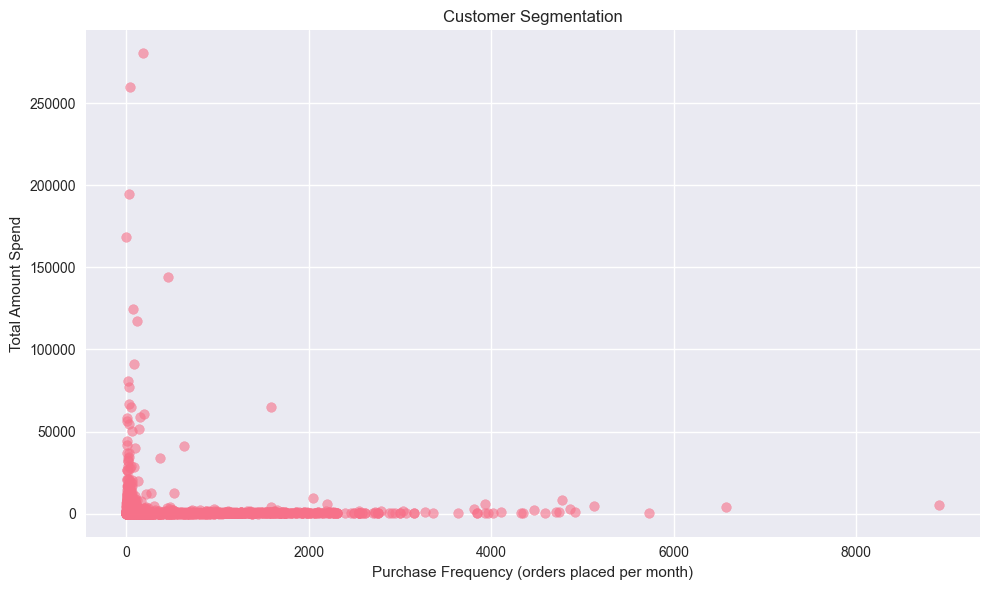

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(customer_metrics['purchase_frequency'],
            customer_metrics['total_spend'],
            alpha=0.6)
plt.title('Customer Segmentation')
plt.xlabel('Purchase Frequency (orders placed per month)')
plt.ylabel('Total Amount Spend')
plt.tight_layout()
plt.show()

### 4.Product Analysis

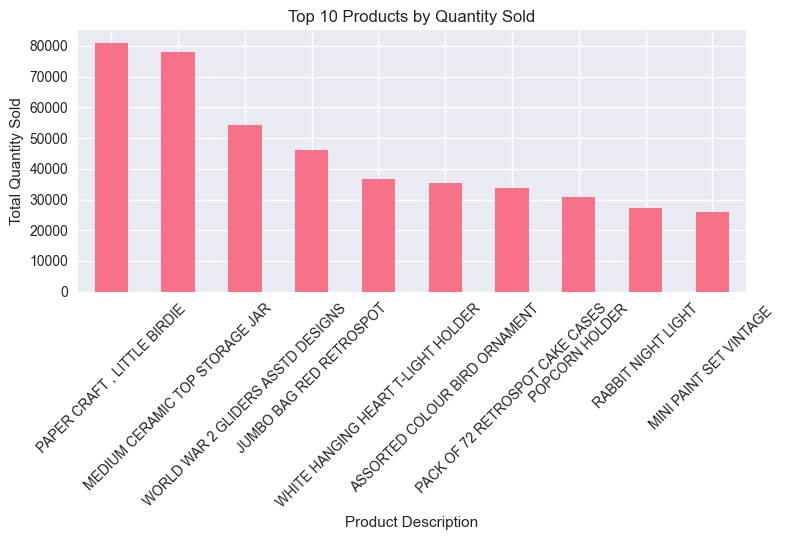

In [5]:
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.Figure(figsize=(12, 6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()